In [63]:
import sqlite3
import matplotlib.pyplot as plt 
import pandas as pd           # Data Manipulation
import numpy as np            # Linear Algebra
import seaborn as sns         # Data Visualization
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

In [64]:
# Connect to database
# conn = sqlite3.connect('example.db')

## Data Overview

In [65]:
# Use pandas to query data
# sheet_name = "small countries are beautiful"
# sql = "SELECT * FROM `small countries are beautiful`"

# df = pd.read_sql_query(sql, conn)

# Transform df(Dataframe) to numeric dtype
df = pd.read_excel("Datasets_cleaned.xlsx", 0)
cols = df.columns
for i in cols[1:]:
    df[i]=pd.to_numeric(df[i],downcast='float', errors='coerce')

# Data Cleaning

## Clean columns
df = df.drop(columns=["happy_planet_index","world_happiness","education_expenditure"])

## Clean rows
df = df.dropna(thresh=len(df.columns)*0.7)

cols

Index(['indicator', 'population', 'gdp_per_cap', 'gdp ', 'gdp_growth',
       'gdp_per_km2', 'land_area', 'population_density', 'total_foreign_born',
       'per_foreign_born', 'population_living_abroad_diaspora',
       'population_living_abroad', 'happy_planet_index', 'world_happiness',
       'human_development_index', 'health_expenditure',
       'education_expenditure',
       'sustainable_economic_development_assessment(seda)', 'unemployment',
       'political_stability&absence_of_violence', 'control_of_corruption',
       'judicial_effectiveness_score', 'government_integrity_score',
       'property_rights_score', 'tax_burden_score',
       'overall_economic_freedom_score', 'financial_freedom_score'],
      dtype='object')

In [66]:
df.describe()

,population,gdp_per_cap,gdp,gdp_growth,gdp_per_km2,land_area,population_density,total_foreign_born,per_foreign_born,population_living_abroad_diaspora,...,sustainable_economic_development_assessment(seda),unemployment,political_stability&absence_of_violence,control_of_corruption,judicial_effectiveness_score,government_integrity_score,property_rights_score,tax_burden_score,overall_economic_freedom_score,financial_freedom_score
count,65.000,65.000000,65.000000,65.000000,6.500000e+01,6.500000e+01,65.000000,64.000,64.000000,6.400000e+01,...,46.000000,64.000000,64.000000,64.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,1904615.375,42.698463,20792.064453,2.489231,3.721242e+06,1.160119e+05,162.844879,247978.625,11.317187,2.742704e+05,...,52.978260,9.025000,-0.101094,-0.025781,45.795380,41.392303,49.390770,74.407692,59.663078,50.153847
std,1577619.875,71.757240,24139.335938,3.424321,8.541287e+06,2.650003e+05,272.648712,527014.000,14.856024,3.471396e+05,...,23.223751,6.365308,0.930753,1.036323,20.217083,17.693417,19.547264,12.570182,10.500901,19.644680
min,100000.000,0.200000,651.900024,-12.200000,5.136568e+03,2.980000e+02,1.979741,2394.000,0.100000,2.844000e+03,...,-64.500000,0.300000,-2.780000,-1.830000,10.000000,17.700001,17.600000,41.400002,31.900000,10.000000
25%,500000.000,3.500000,5553.399902,1.100000,2.306045e+05,5.128000e+03,31.032791,14630.750,2.475000,5.624650e+04,...,45.525000,4.975000,-0.710000,-0.665000,28.200001,27.500000,35.500000,69.599998,52.299999,40.000000
50%,1400000.000,18.400000,11840.200195,2.500000,8.128644e+05,2.318000e+04,73.725876,65552.500,6.700000,1.262595e+05,...,54.950001,7.200000,0.030000,-0.270000,44.500000,36.799999,48.599998,76.099998,60.000000,50.000000
75%,3000000.000,38.500000,25709.800781,4.300000,2.345120e+06,6.888300e+04,168.154678,191534.250,13.200000,3.510650e+05,...,65.850000,11.425000,0.667500,0.750000,57.299999,50.900002,62.099998,83.000000,67.500000,60.000000
max,4900000.000,329.200012,127659.601562,10.200000,5.474684e+07,1.553556e+06,1454.433350,2866136.000,73.800003,1.650772e+06,...,83.699997,29.700001,1.190000,2.220000,93.400002,89.800003,89.000000,99.900002,80.900002,90.000000


In [75]:
df

,indicator,population,gdp_per_cap,gdp,gdp_growth,gdp_per_km2,land_area,population_density,total_foreign_born,per_foreign_born,...,sustainable_economic_development_assessment(seda),unemployment,political_stability&absence_of_violence,control_of_corruption,judicial_effectiveness_score,government_integrity_score,property_rights_score,tax_burden_score,overall_economic_freedom_score,financial_freedom_score
0,Albania,2900000.0,34.200001,11840.200195,1.5,1.248266e+06,27398.0,104.870697,57616.0,3.100000,...,53.099998,8.500000,-2.78,-1.52,28.200001,26.200001,17.900000,91.800003,51.299999,10.0
1,Armenia,3000000.0,25.799999,8621.000000,2.6,9.147963e+05,28203.0,102.931152,191199.0,10.600000,...,51.700001,16.299999,0.40,-0.42,25.400000,39.900002,54.099998,85.099998,64.500000,70.0
2,Bahamas,400000.0,9.000000,24555.199219,3.7,8.991009e+05,10010.0,39.496605,59306.0,16.299999,...,60.400002,11.200000,-0.96,-0.61,35.200001,29.000000,27.799999,74.000000,44.700001,30.0
4,Barbados,300000.0,4.800000,17100.199219,3.0,1.116279e+07,430.0,664.462769,34475.0,11.300000,...,60.799999,6.600000,-0.29,-1.41,25.400000,18.900000,36.000000,82.400002,48.599998,40.0
6,Bhutan,800000.0,6.500000,8227.400391,1.2,1.692973e+05,38394.0,21.187658,51106.0,6.700000,...,47.700001,6.600000,0.18,-0.26,44.500000,32.599998,40.799999,65.699997,52.299999,60.0
7,Bosnia and Herzegovina,3900000.0,42.200001,10957.500000,3.0,8.244281e+05,51187.0,68.496429,34803.0,0.600000,...,50.200001,16.799999,-0.71,-0.56,47.400002,40.500000,55.299999,84.699997,68.699997,70.0
8,Botswana,2200000.0,36.700001,17041.599609,2.5,6.475747e+04,566730.0,4.043656,160644.0,7.200000,...,44.099998,5.700000,0.90,1.80,93.400002,77.400002,78.699997,63.000000,80.900002,90.0
9,Brunei Darussalam,400000.0,32.500000,76884.000000,0.9,6.172840e+06,5265.0,81.346680,102733.0,49.299999,...,72.500000,6.100000,1.04,1.53,80.900002,73.500000,83.500000,49.900002,71.800003,70.0
10,Cabo Verde,500000.0,3.500000,6662.000000,1.1,8.678403e+05,4033.0,135.580154,14924.0,3.000000,...,NaN,5.100000,-0.76,-0.88,36.799999,39.900002,53.599998,87.500000,64.300003,60.0
11,Central African Republic,4900000.0,3.200000,651.900024,0.5,5.136568e+03,622984.0,7.478699,81598.0,2.900000,...,16.100000,15.300000,1.00,1.17,53.500000,50.900002,46.500000,96.500000,63.299999,60.0


# Data Transform

## Data Normalization

In [67]:
# Normalize the data except a few cols

df_norm = df.copy()

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
df_norm[df_norm.columns[1:]] = min_max_scaler.fit_transform(df[df_norm.columns[1:]])


df_norm.describe()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype float32 were all converted to float64 by MinMaxScaler.



,population,gdp_per_cap,gdp,gdp_growth,gdp_per_km2,land_area,population_density,total_foreign_born,per_foreign_born,population_living_abroad_diaspora,...,sustainable_economic_development_assessment(seda),unemployment,political_stability&absence_of_violence,control_of_corruption,judicial_effectiveness_score,government_integrity_score,property_rights_score,tax_burden_score,overall_economic_freedom_score,financial_freedom_score
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,64.000000,64.000000,64.000000,...,46.000000,64.000000,64.000000,64.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,0.375962,0.129175,0.158574,0.655769,0.067884,0.074498,0.110754,0.085757,0.152201,0.164708,...,0.792701,0.296769,0.674787,0.445486,0.429201,0.328603,0.445249,0.564234,0.566593,0.501923
std,0.328671,0.218107,0.190062,0.152871,0.156029,0.170609,0.187716,0.184030,0.201574,0.210652,...,0.156705,0.216507,0.234447,0.255882,0.242411,0.245401,0.273771,0.214875,0.214304,0.245559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.083333,0.010030,0.038592,0.593750,0.004119,0.003110,0.020003,0.004273,0.032225,0.032406,...,0.742409,0.159014,0.521411,0.287654,0.218225,0.135922,0.250700,0.482051,0.416327,0.375000
50%,0.270833,0.055319,0.088092,0.656250,0.014755,0.014732,0.049397,0.022055,0.089552,0.074891,...,0.806005,0.234694,0.707809,0.385185,0.413669,0.264910,0.434174,0.593162,0.573469,0.500000
75%,0.604167,0.116413,0.197294,0.736607,0.042746,0.044156,0.114410,0.066047,0.177748,0.211308,...,0.879555,0.378401,0.868388,0.637037,0.567146,0.460472,0.623249,0.711111,0.726531,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Visualization for overview

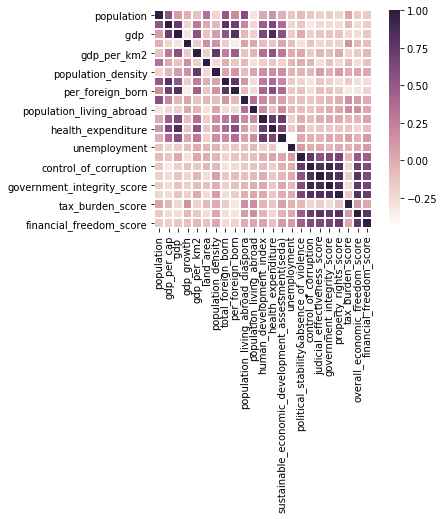

In [69]:
# Subset the data to key cols
# Visualize correlation in a heapmap

cols_name = df_norm.columns
df_corr = df_norm[cols_name]
cor = df_corr[1:].corr()

# Color palette
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(cor, square = True, linewidths = 1,
           cmap = cmap)

population gdp_per_cap


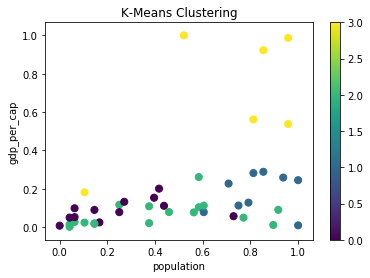

In [70]:
#K means Clustering

df_kmeans = df_norm.dropna(axis='index', how='any')

# print(df_kmeans.head())


def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)


# print(np.any(np.isnan(df_kmeans)))
# print(np.all(np.isfinite(df_kmeans)))

sample = df_kmeans[df_kmeans.columns[1:]]
# print(sample)
clust_labels, cent = doKmeans(sample, 4)
kmeans = pd.DataFrame(clust_labels)
sample.insert((sample.shape[1]),'kmeans',kmeans)

fig = plt.figure()
ax = fig.add_subplot(111)
axis1 = cols_name[1]
axis2 = cols_name[2]
print(axis1, axis2)
scatter = ax.scatter(sample[axis1],sample[axis2],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel(axis1)
ax.set_ylabel(axis2)
plt.colorbar(scatter)


In [71]:
#choropleth-maps
#Ref: https://plot.ly/python/choropleth-maps/
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

axis = cols_name[2] #'gdp_per_capita'
# axis = 'population'

data = dict(type = 'choropleth', 
           locations = df_norm['indicator'],
           locationmode = 'country names',
           z = df_norm[axis], 
           text = df_norm['indicator'],
           colorbar = {'title':axis},
           marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) )
           )

scope = 'globe'
# scope = 'asia'

layout = dict(title = axis2, 
             geo = dict(scope=scope,
                        showframe = False, 
                       projection = {'type': 'Mercator'}))

choromap3 = go.Figure(data = [data], layout=layout)

iplot(choromap3)

In [72]:
# pp = sns.pairplot(df_kmeans[cols_name], height=1.8, aspect=1.8,
#                   plot_kws=dict(edgecolor="k", linewidth=0.5),
#                   diag_kind="kde", diag_kws=dict(shade=True))

# fig = pp.fig 
# fig.subplots_adjust(top=0.93, wspace=0.3)
# t = fig.suptitle('small countries', fontsize=14)
# t

## Add Continent Column to valid data

In [87]:
import country_converter as converter

countries = list(df_norm.indicator.values)

df_norm['continent'] = converter.convert(names=countries, to='continent') 

# df_norm['continent']

In [73]:
df_norm[cols_name[1:]].loc[0].values
# print(cols[1:])

array([0.58333333, 0.10334346, 0.08809151, 0.61160714, 0.02270901,
       0.0174472 , 0.07083941, 0.01928316, 0.04070556, 0.67968139,
       0.56654382, 0.73204905, 0.11685039, 0.79352227, 0.27891156,
       0.        , 0.07654322, 0.21822542, 0.11789181, 0.00420167,
       0.86153849, 0.39591834, 0.        ])

## Overview for all nations

In [76]:
# import plotly.plotly as py
# import plotly.graph_objs as go

data = []
color = "rgba(255,255,255,0)"

for i in range(len(df_norm)):
    data.append(go.Scatterpolar(
        name = df_norm['indicator'].iloc[i],
        mode = "lines",
        fill = "toself",
        fillcolor = "rgba(180,120,150,0.1)",
        r = df_norm[cols_name[1:]].iloc[i].values,
        theta = cols_name[1:],
        marker = dict(
            color = color,
        ),
        line = dict(
            shape = "spline",
            color = color,
        )
    ))


layout = go.Layout(
    showlegend = False,
    polar=dict(
        angularaxis=dict(
            tickfont = dict(
                size = 8
                
            ),
            ticks = "outside" ,
            rotation = 90,
            direction = "clockwise"
        ),
        radialaxis=dict(
            visible=True,
            nticks=4,
            range = [0, 1.2]
        )
    )
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [104]:
df_sorted = df_norm.sort_values(by=['continent', 'indicator'])

## Access row using .iloc[]
# df_sorted.iloc[0]

In [298]:
## Polar Chart for each Continent

# data = []
# color = "rgba(255,255,255,0)"

# for i in range(len(df_norm)):
#     data.append(go.Scatterpolar(
#         name = df_norm['indicator'].iloc[i],
#         mode = "lines",
#         fill = "toself",
#         fillcolor = "rgba(180,120,150,0.1)",
#         r = df_norm[cols_name[1:]].iloc[i].values,
#         theta = cols_name[1:],
#         marker = dict(
#             color = color,
#         ),
#         line = dict(
#             shape = "spline",
#             color = color,
#         )
#     ))


# data.append(go.Scatterpolar(
#       name = "radial categories",
#       r = ["a", "b", "c", "d", "b", "f", "a"],
#       theta = [1, 4, 2, 1.5, 1.5, 6, 5],
#       thetaunit = "radians",
#       fill = "toself",
#       subplot = "polar2"
#     ))
    
# layout = go.Layout(
#     showlegend = False,
#     polar=dict(
#         domain = dict(
#             x = [0, 0.46],
#             y = [0.56, 1]
#         ),
#         angularaxis=dict(
#             tickfont = dict(
#                 size = 8
                
#             ),
#             ticks = "outside" ,
#             rotation = 90,
#             direction = "clockwise"
#         ),
#         radialaxis=dict(
#             visible=True,
#             nticks=4,
#             range = [0, 1.2]
#         )
#     ),
#     polar2 = dict(
#       domain = dict(
#         x = [0, 0.46],
#         y = [0, 0.44]
#       ),
#       radialaxis = dict(
#         angle = 180,
#         tickangle = -180
#       )
#     )
# )

# fig = go.Figure(data=data, layout=layout)
# iplot(fig)

## Overview for each continent

In [347]:
from plotly import tools
from random import randint

total= df_norm['continent'].nunique()
cols=3
rows = total//cols+1

traces = []
subplot_titles = []

# setup = dict(name = data[0], # country name
#             subplot = subplot,
#             r = data[1:-2],
#             theta = df_norm.columns[1:-2],
#             marker = dict(
#                 color = color,
#             )
#         )



# mode_line = dict(
#             mode = "lines",
#             line = dict(shape = "spline",
#                         color = "rgba(255,255,255,0)"
#             )
#         )
# a={**setup, **mode_line}
# print(*a)


# Plot one subplot 
def draw_one_nation(data, subplot):

    
    return go.Scatterpolar(
            name = data[0], # country name
            subplot = subplot,
            r = data[1:-2],
            theta = df_norm.columns[1:-2],
#             mode = "lines",
#             fill = "toself",
#             fillcolor = "rgba(180,120,150,0.3)",
#             line = dict(
#                 shape = "spline",
#                 color = "rgba(180,120,150,0.3)",
#             ) 
        mode = "markers",
        marker = dict(
            color = "rgba(180,120,150,0.4)",
            
        )
    )
    

# Plot for group of continents
continents = df_norm.groupby('continent')
# continents.groups['Africa']
data = []
    
for i, continent in enumerate(continents):
    nations = continent[1] #df

    subplot = "polar"
    if i != 0:
        subplot += str(i+1)
    
    for i in range(len(nations)):
        nation = nations.iloc[i]
#         print(nation[0])
        data.append(draw_one_nation(nation, subplot))
    

    
# Subplot format
total = 5
cols = 3
rows = total//cols+1


width = 1/cols*0.8
height = 1/rows*0.8

w_offset = 1/cols*0.2
h_offset = 1/rows*0.2

polars = dict()
for i, continent in enumerate(continents):
    subplot = "polar"

    if i!=0:
        subplot += str(i+1)
        
    col = i % cols
    row = i // cols

    x = [(width+w_offset)*(col), width*(col+1) + w_offset*col]
    y = [1-height*(row+1)-h_offset*row, 1-(height+h_offset)*(row)]
        
#     print(continent[0], col, row)

    
    polars[subplot] = dict(
        domain = dict(
            x = x,
            y = y
        ),
        angularaxis=dict(
            tickfont = dict(
                size = 8 
            ),
            ticks = "outside" ,
            rotation = 90,
            direction = "clockwise"
        ),
        radialaxis = dict(
            visible = True,
            tickfont = dict(
                size = 6 
            ),
            nticks = 4,
            range = [0, 1.2]
        )
    )

    
layout = go.Layout(
    showlegend = False,
    title = "Small Nation in different Continents ",
)


fig = go.Figure(data=data, layout=layout)
fig['layout'].update(polars)
fig['layout'].update(height=800, width=1000)
iplot(fig)